In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import splinelib as tsp

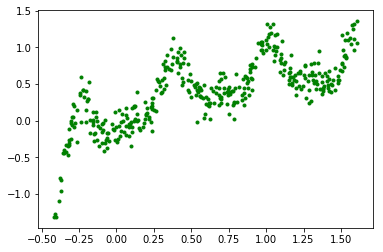

In [2]:
x = np.linspace(0,2,400)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.05, x.shape)*3
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

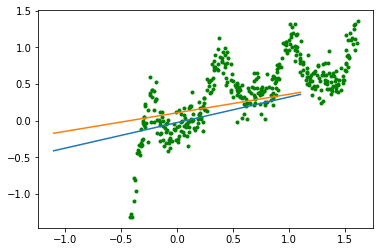

In [3]:
n_hidden = 2
lr=0.1
spline = tsp.SplineMatrixLayer(1, n_hidden, max_points=2)
max_points = 3
splineList = []
for spline_ in spline.spline_mat:
    for spline__ in spline_:
        splineList.append(spline__)
        spline__.n_max = max_points

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
for spline_ in spline.spline_mat:
    for spline__ in spline_:
        plt.plot(spline__.X, spline__.Y)

_______________________
Steps 0
Error 0.029033057655248468


_______________________
Steps 10
Error 0.029033057655248468


_______________________
Steps 20
Error 0.029033057655248468


_______________________
Steps 30
Error 0.029033057655248468


_______________________
Steps 40
Error 0.029033057655248468


_______________________
Steps 50
Error 0.02903305765524847


_______________________
Steps 60
Error 0.029033057655248468


_______________________
Steps 70
Error 0.029033057655248468


_______________________
Steps 80
Error 0.029033057655248475


_______________________
Steps 90
Error 0.029033057655248468


_______________________
Steps 100
Error 0.029033057655248468


_______________________
Steps 110
Error 0.029078616099390185


_______________________
Steps 120
Error 0.029059059795772068


_______________________
Steps 130
Error 0.029051762710172443


_______________________
Steps 140
Error 0.029047061190304722


_______________________
Steps 150
Error 0.02904388786562614


_____



_______________________
Steps 1330
Error 0.023395101190832115


_______________________
Steps 1340
Error 0.023388955262080954


_______________________
Steps 1350
Error 0.023382843382773966


_______________________
Steps 1360
Error 0.023377035405306477


_______________________
Steps 1370
Error 0.023371545909071808


_______________________
Steps 1380
Error 0.02336459686004189


_______________________
Steps 1390
Error 0.023356486395650418


_______________________
Steps 1400
Error 0.023349378250552385


_______________________
Steps 1410
Error 0.023342740628299843


_______________________
Steps 1420
Error 0.023336386399658248


_______________________
Steps 1430
Error 0.023327068306708436


_______________________
Steps 1440
Error 0.02331803369078889


_______________________
Steps 1450
Error 0.023309670798560608


_______________________
Steps 1460
Error 0.023302040833001046


_______________________
Steps 1470
Error 0.023294032815180943


_______________________
Steps 1480
Error

_______________________
Steps 2630
Error 0.022981122362519635


_______________________
Steps 2640
Error 0.022980361092911114


_______________________
Steps 2650
Error 0.022979606033634664


_______________________
Steps 2660
Error 0.022978886673346795


_______________________
Steps 2670
Error 0.022978159026412526


_______________________
Steps 2680
Error 0.022977409180066362


_______________________
Steps 2690
Error 0.02297671481213366


_______________________
Steps 2700
Error 0.02297600753241066


_______________________
Steps 2710
Error 0.022975316398606754


_______________________
Steps 2720
Error 0.022974670033131344


_______________________
Steps 2730
Error 0.022973976681453453


_______________________
Steps 2740
Error 0.022973311044088153


_______________________
Steps 2750
Error 0.022972656077479843


_______________________
Steps 2760
Error 0.02297204305725658


_______________________
Steps 2770
Error 0.022971381990031844


_______________________
Steps 2780
Error 0.

Error 0.022921636884071762


_______________________
Steps 3930
Error 0.022921347041182923


_______________________
Steps 3940
Error 0.022921067543200568


_______________________
Steps 3950
Error 0.022920809154479523


_______________________
Steps 3960
Error 0.022920497216698504


_______________________
Steps 3970
Error 0.02292013485233939


_______________________
Steps 3980
Error 0.02291987893930493


_______________________
Steps 3990
Error 0.02292041834524781


_______________________
Steps 4000
Error 0.022919742004111843


_______________________
Steps 4010
Error 0.022919228040975334


_______________________
Steps 4020
Error 0.02291879448584381


_______________________
Steps 4030
Error 0.022919405503866005


_______________________
Steps 4040
Error 0.022918619690764967


_______________________
Steps 4050
Error 0.02291806359845773


_______________________
Steps 4060
Error 0.02291822784186296


_______________________
Steps 4070
Error 0.022917559451067646


_________________

TclError: invalid command name "pyimage84"

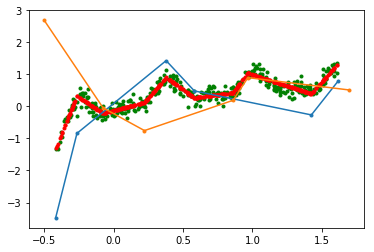

In [13]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()
indx = 0

for step in range(100000):

    a1 = spline.forward(xx)
    yout = a1.sum(axis=1, keepdims=True)
    dy = yout-yy
    
    da1 = np.hstack([dy]*n_hidden)
    dx = spline.backward(da1)
    spline.update(lr)
    
    if step % 100 == 0 and step !=0 :
        if indx == len(splineList): indx = 0
        spl = splineList[indx]
        indx += 1
        spl._maintain_good_spline_()
        
    if step % 10 == 0:            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.scatter(x, yout.reshape(-1), marker='.', color='r')
        for spline_ in spline.spline_mat:
            for spline__ in spline_:
                plt.plot(spline__.X, spline__.Y, marker='.')
                
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

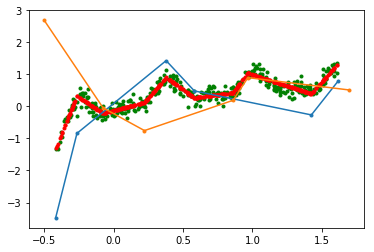

In [15]:
%matplotlib inline

plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), marker='.', color='r')
for spline_ in spline.spline_mat:
    for spline__ in spline_:
        plt.plot(spline__.X, spline__.Y, marker='.')

In [12]:
spline._increase_pieces_(1)

In [14]:
'''
let total number of splines = n
    total number of piece per spline = m
then,
    final number of pieces(max/optimum) = n(m-1)
'''
n_hidden*(spline.spline_mat[0][0].n_max - 1)

10